In [1]:
# Load the dataset:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [2]:
# Split the dataset and do our preprocessing:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28 is the original 2D image. We transform our 2D dataset to 1D
output_dim = nb_classes = 10 # 10 digits --> 10 classes
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim) # 60000 is the amount of train entries
X_test = X_test.reshape(10000, input_dim) # 10000 is the amount of test entries
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale)
X_test /= 255

In [3]:
# One hot code our target variable using to_categorical function of Keras' utils module
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [4]:
# Take a look at the shape of X_train. We have 60000 rows and 784 features
X_train.shape

(60000, 784)

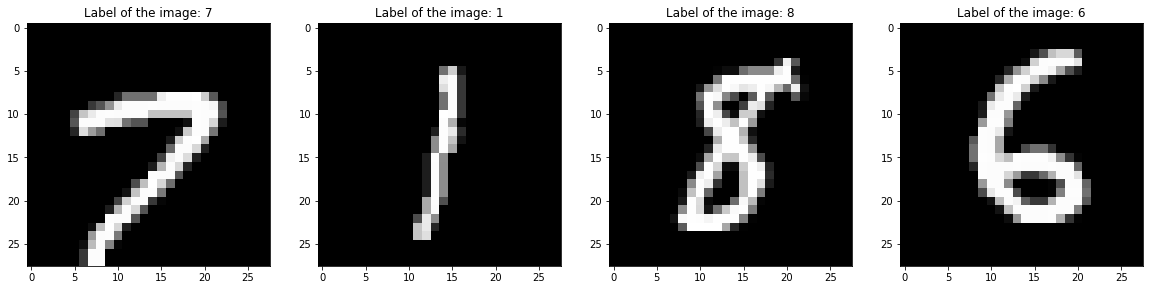

In [6]:
# Take a look at some of the original images:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(1,4,2)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(1,4,3)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(1,4,4)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 8 as the mini batch size

In [9]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

# Compiling the model:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.3647 - accuracy: 0.8969
Epoch 2/20
60000/60000 [==============================] - 19s 322us/sample - loss: 0.1686 - accuracy: 0.9503
Epoch 3/20
60000/60000 [==============================] - 22s 371us/sample - loss: 0.1240 - accuracy: 0.9636- los
Epoch 4/20
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0980 - accuracy: 0.9707
Epoch 5/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0798 - accuracy: 0.9765
Epoch 6/20
60000/60000 [==============================] - 18s 299us/sample - loss: 0.0669 - accuracy: 0.9796
Epoch 7/20
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0567 - accuracy: 0.9834
Epoch 8/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0487 - accuracy: 0.9856
Epoch 9/20
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0426 - accuracy

In [10]:
# Print out the testing score:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07260856416276947
Test accuracy: 0.9793


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 128 as the mini batch size

In [14]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model1 = Sequential()
# our first dense layer
model1.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model1.add(Dense(64, activation="relu"))
# last layer is the output layer.
model1.add(Dense(10, activation="softmax"))

# Compiling the model:
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 42us/sample - loss: 1.1541 - accuracy: 0.7183
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4786 - accuracy: 0.8741
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3815 - accuracy: 0.8946
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3388 - accuracy: 0.9043
Epoch 5/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3115 - accuracy: 0.9111
Epoch 6/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2915 - accuracy: 0.9164
Epoch 7/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2751 - accuracy: 0.9218
Epoch 8/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2609 - accuracy: 0.9259
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2490 - accuracy: 0.9293
Epoch 10/20
60

In [13]:
# Print out the testing score:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16940312106907368
Test accuracy: 0.9516


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using the full sample as the batch

In [15]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model2 = Sequential()
# our first dense layer
model2.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model2.add(Dense(64, activation="relu"))
# last layer is the output layer.
model2.add(Dense(10, activation="softmax"))

# Compiling the model:
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model2.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/sample - loss: 2.3755 - accuracy: 0.0998
Epoch 2/20
60000/60000 [==============================] - 2s 27us/sample - loss: 2.3656 - accuracy: 0.1004
Epoch 3/20
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3562 - accuracy: 0.1010
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3473 - accuracy: 0.1022
Epoch 5/20
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3388 - accuracy: 0.1038
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 2.3306 - accuracy: 0.1055
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 2.3227 - accuracy: 0.1077
Epoch 8/20
60000/60000 [==============================] - 1s 13us/sample - loss: 2.3151 - accuracy: 0.1104
Epoch 9/20
60000/60000 [==============================] - 1s 14us/sample - loss: 2.3078 - accuracy: 0.1143
Epoch 10/20
60

In [16]:
# Print out the testing score:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.2347884399414064
Test accuracy: 0.198


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 0.01 as the learning rate

In [17]:
from tensorflow.keras import optimizers
sgd_001 = optimizers.SGD(lr=0.01)
sgd_100 = optimizers.SGD(lr=100)
sgd_00000001 = optimizers.SGD(lr=0.0000001)

In [19]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model3 = Sequential()
# our first dense layer
model3.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model3.add(Dense(64, activation="relu"))
# last layer is the output layer.
model3.add(Dense(10, activation="softmax"))

# Compiling the model:
model3.compile(optimizer=sgd_001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 1.2397 - accuracy: 0.6780
Epoch 2/20
60000/60000 [==============================] - 2s 42us/sample - loss: 0.5040 - accuracy: 0.8684
Epoch 3/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3911 - accuracy: 0.8928
Epoch 4/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3439 - accuracy: 0.9027
Epoch 5/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3155 - accuracy: 0.9109
Epoch 6/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2947 - accuracy: 0.9173
Epoch 7/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2784 - accuracy: 0.9211
Epoch 8/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2645 - accuracy: 0.9248
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2525 - accuracy: 0.9284
Epoch 10/20
60

In [20]:
# Print out the testing score:
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16598114916086196
Test accuracy: 0.9506


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 100 as the learning rate

In [21]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model4 = Sequential()
# our first dense layer
model4.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model4.add(Dense(64, activation="relu"))
# last layer is the output layer.
model4.add(Dense(10, activation="softmax"))

# Compiling the model:
model4.compile(optimizer=sgd_100, loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model4.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/sample - loss: 110325589.2361 - accuracy: 0.1017
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 40.1435 - accuracy: 0.1007
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 40.1978 - accuracy: 0.0988
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 39.6207 - accuracy: 0.1016
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 40.7930 - accuracy: 0.1000
Epoch 6/20
60000/60000 [==============================] - 2s 39us/sample - loss: 39.3494 - accuracy: 0.1026
Epoch 7/20
60000/60000 [==============================] - 2s 36us/sample - loss: 40.0644 - accuracy: 0.1006
Epoch 8/20
60000/60000 [==============================] - 2s 36us/sample - loss: 41.1019 - accuracy: 0.0979
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 40.0284 - accuracy: 0.099

In [22]:
# Print out the testing score:
score = model4.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 39.684728338623046
Test accuracy: 0.0974


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 0.0000001 as the learning rate

In [23]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model5 = Sequential()
# our first dense layer
model5.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model5.add(Dense(64, activation="relu"))
# last layer is the output layer.
model5.add(Dense(10, activation="softmax"))

# Compiling the model:
model5.compile(optimizer=sgd_00000001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 4/20
60000/60000 [==============================] - 2s 36us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 5/20
60000/60000 [==============================] - 2s 35us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 8/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.3122 - accuracy: 0.0970
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 2.3121 - accuracy: 0.0970
Epoch 10/20
60

In [24]:
# Print out the testing score:
score = model5.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.3115089763641357
Test accuracy: 0.0984
